In [1]:
#Reference
import numpy as np
import scipy as sp
from scipy.spatial import KDTree
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import math

import os
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Sampling from Guassian => Find P(0) (using KDE); The Model of 0 Vector
#d==dimension
d=4
mean = np.ones(d)

#Define Gaussian Class
class Gaussian:
    def __init__(self, covmat=0.1*np.diag(v=np.ones(len(mean)), k=0)):
        self.covmat = covmat        
    def evaluate(self, x, mean):
        cov = self.covmat
        inv_cov = np.linalg.inv(cov)
        if (np.linalg.det(2*np.pi*cov))**(-0.5) >= 0.0:
            return((2*np.pi*(np.linalg.det(cov)))**(-0.5) * np.exp(-0.5*(x-mean)@inv_cov@(x-mean)))
        else:
            print("Determinant of covariance matrix is not positive definite.")

#Sample Points from Gaussian
g = Gaussian()
mean = np.ones(d)
x=np.zeros(len(mean))
covariance = np.diag(v=np.ones(len(mean)), k=0)
samples = np.random.multivariate_normal(mean, covariance, size=1000)
P0 = 0
for m in samples:
    P0 += (1000)**(-1.0)*g.evaluate(x,mean)
   
print(samples)
print(P0)
print(len(mean))  #Check dim

[[ 2.03635845  2.73194268 -0.32504702  1.61290082]
 [ 1.58509579  0.33394105  0.65822796  2.65089967]
 [-0.58117569  1.48542526 -1.21287554 -0.75406044]
 ...
 [ 0.03401621  1.96403158  0.99963239  0.80001093]
 [ 0.8318861  -0.01524398  2.19553437 -0.00889107]
 [ 0.58745145  0.59702021  0.40384752 -1.26664114]]
8.222813263933126e-08
4


[4.06677353e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[4.06677353e-08 1.18737907e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[4.06677353e-08 1.18737907e-01 8.15790575e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[4.06677353e-08 1.18737907e-01 8.15790575e-03 2.33764249e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[4.06677353e-08 1.18737907e-01 8.15790575e-03 2.33764249e-01
 1.65375005e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[4.06677353e-08 1.18737907e-01 8.15790575e-03 2.33764249e-01
 1.65375005e-04 4.28316172e-04 0.00000000e+00 0.00000000e+00]
[4.06677353e-08 1.18737907e-01 8.15790575e-03 2.33764249e-01
 1.65375005e-04 4.28316172e-04 1.70669390e-03 0.00000000e+00]
[4.06677353e-08 1.18737907e-01 8.15790575e-03 2.33764249e-01
 1.65375005e-04 4.28316172e-04 1.70669390e-03 2.27298763e-02]


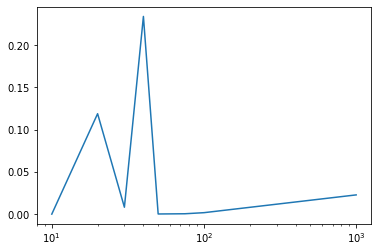

In [3]:
#Generate Random Samples, Used as a check
sample_length = [10, 20, 30, 40, 50, 75, 100, 1000]
pval = np.zeros(len(sample_length))
for i in range(len(sample_length)):
    length = sample_length[i]
    samples = np.random.multivariate_normal(mean, covariance, size=length)
    P=0
    for m in samples:
        P += (length)**(-1.0)*g.evaluate(x,m)
    
    pval[i] = P
    print(pval)

plt.plot(sample_length, pval)
plt.xscale('log')

In [4]:
#KD-Tree Time :O
#From sample lengths, find k+1 nearest neighbors with kdtree, k=100 nearest neighbors
kdtree = KDTree(samples)
query = kdtree.query(x=np.zeros(d), k=100)
#Query KD-Tree for nearest Neighbors
print(query)
index = query[1]
print(index)
data = kdtree.data[index]
#Get data points of the nearest neighbors
print(data)

(array([0.52842363, 0.67820923, 0.73027656, 0.83446873, 0.87184918,
       0.87698547, 0.90916183, 0.92816852, 1.01560797, 1.04391178,
       1.04563053, 1.05697178, 1.07127815, 1.07434813, 1.08089631,
       1.08420906, 1.08507558, 1.09489136, 1.11906284, 1.13010103,
       1.15407387, 1.15746104, 1.18968987, 1.19376032, 1.19474737,
       1.20448627, 1.24053204, 1.24813016, 1.26229383, 1.2772794 ,
       1.29501398, 1.31000644, 1.31980748, 1.32837207, 1.32913877,
       1.35429825, 1.36697838, 1.36917638, 1.37475314, 1.3759831 ,
       1.37733024, 1.38715269, 1.38736232, 1.38768169, 1.39057483,
       1.39971666, 1.40445188, 1.40865261, 1.42161425, 1.42185802,
       1.42598164, 1.42644204, 1.43203412, 1.43262688, 1.4401252 ,
       1.44587456, 1.44950506, 1.47202298, 1.48453955, 1.48729269,
       1.5023511 , 1.50326683, 1.5191073 , 1.52350027, 1.52473637,
       1.52663603, 1.52673177, 1.53369   , 1.53465017, 1.55122296,
       1.55565181, 1.5635964 , 1.566523  , 1.57140057, 1.5734

In [5]:
#Gaussian Around Sampled Points

pvalsamples = np.zeros(len(samples))

#Pick one data point as modelled point, compare every other point to "modelled" point
for i in range(len(samples)):
    modpoint = samples[i]
    modquery = kdtree.query(modpoint, k=100)
    modindex = modquery[1]
    moddata = kdtree.data[modindex]
    print('\r' +str(i),end='')
    Pd = (1/1000)
    for j in range(len(moddata)):
        Pd += (1000)**(-1.0)*g.evaluate(moddata[j], modpoint)
        
    pvalsamples[i] = Pd #Pval of samples 

#print(len(data))
#print(data)

print(pvalsamples)

999[0.05074138 0.12627255 0.04652234 0.13707242 0.27473386 0.0524519
 0.06853089 0.16963052 0.10056096 0.22707638 0.1813553  0.19373669
 0.22759493 0.3031651  0.04436417 0.04987656 0.07118207 0.07221514
 0.24850501 0.17760749 0.11178258 0.09368036 0.12938817 0.14020894
 0.08196784 0.07629702 0.05965492 0.257489   0.06516989 0.09280562
 0.10698667 0.09885878 0.06036142 0.14845801 0.04535396 0.08816502
 0.07298548 0.08751138 0.04142261 0.39688424 0.15591314 0.06489775
 0.05368896 0.10095942 0.14713432 0.15483865 0.09220913 0.29775369
 0.10537341 0.065336   0.09988745 0.06973076 0.08649547 0.29543732
 0.07380235 0.0933243  0.24789038 0.04967037 0.07533456 0.11565242
 0.04219366 0.041947   0.04095429 0.16870461 0.04837999 0.10415924
 0.0682266  0.1471093  0.14760541 0.14630304 0.16884889 0.06048886
 0.30694343 0.29894759 0.27125978 0.06414519 0.21814949 0.19675015
 0.30768723 0.09989143 0.08910453 0.12468624 0.07418944 0.14411178
 0.26018093 0.2288274  0.1533163  0.04492951 0.04255957 0.05

In [6]:
#Compare Values Pi to P0
#Want to count all points that satify (Pi > P0) for integration; save other points for later

Accept = []   #Accept Pi >= P0
Reject = []   #Reject because Pi < P0

for i in range(len(pvalsamples)):
    Pi = pvalsamples[i]
    if (Pi >= P0):
        print('Yeehaw!')
        Accept.append(Pi)
    else:
        print('Nope lol, you tried')
        Reject.append(Pi)

print(len(Accept))
print(len(Reject))

print(Accept)
print(Reject)  

Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!
Yeehaw!


In [7]:
#Which Pi < P0 to accept b/c boundary point? Redemption time!
# k==Nearest Neighbors, if nearest neighbor number is too low, won't count points that are maybe important

NN= int(input('How many nearest neighbors?'))

Redemption = []
Death = []

for i in range(len(Reject)):
    Re = Reject[i]
    if (Re*(len(samples)- NN) >= P0):
        Redemption.append(Re)
    else:
        Death.append(Re)
        
print(len(Redemption), len(Death))
print(Redemption)

How many nearest neighbors?100
0 0
[]


In [8]:
#Redemption needs to be KDTree'd to find it's nearest nearest neighbors, but better than before

#For what index point does the pval fail in Redemption???

#To index Redemption, define the index lol
def index(listofelements, element):
    positioninlist = []
    indexposition = 0
    while True:
        indexposition = listofelements.index(element, indexposition)
        positioninlist.append(indexposition)
        indexposition += 1
    return positioninlist

index(samples, positioninlist)

for i in range(len(Redemption)):
    redemption = Redemption[i]
    redokdt = KDTree(redemption)
    redoquery = kdtree.query(redemption, k=2*NN)
    redoindex = redoquery[1]
    findata = kdtree.data[redoindex]
    Pred = (1/1000)
    for j in range(len(findata)):
        Pred += (1/1000)*g.evaluate(findata, mean)

    
    


NameError: name 'positioninlist' is not defined